In [ ]:
import torch

In [ ]:
# download mnist data
from torchvision import datasets
from torchvision.transforms import ToTensor

In [ ]:
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True,
)

100%|██████████| 9912422/9912422 [00:00<00:00, 92768966.82it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 28462334.08it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 23836229.83it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 21429166.22it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:

test_data = datasets.MNIST(
    root = 'data',
    train = False,
    transform = ToTensor()
)

In [ ]:
print(train_data)

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [ ]:
print(test_data)

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [ ]:

print(train_data.data.size())


torch.Size([60000, 28, 28])


In [ ]:
print(train_data.targets.size())

torch.Size([60000])


**visualization of MNIST data**

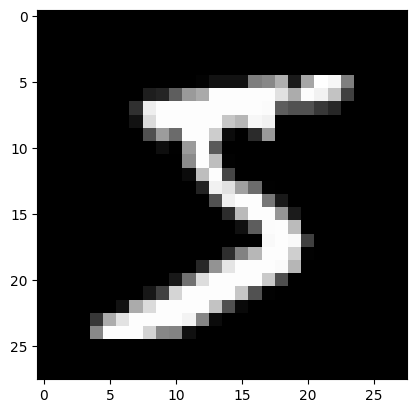

In [ ]:
#plot single train data
import matplotlib.pyplot as plt
plt.imshow(train_data.data[0],cmap ='gray')#imshow displays output as image
plt.show()

In [ ]:
#plot multiple train  data
figure = plt.figure(figsize = (10,8))


<Figure size 1000x800 with 0 Axes>

In [ ]:
#dataloaders
from torch.utils.data import DataLoader
loaders = {'train' : torch.utils.data.DataLoader(train_data,
                                          batch_size=100,
                                          shuffle=True,
                                          num_workers=1),

    'test'  : torch.utils.data.DataLoader(test_data,
                                          batch_size=100,
                                          shuffle=True,
                                          num_workers=1),
}

In [ ]:
#creating convolution neural network from torch.nn
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.conv1 = nn.Conv2d(1, 6, 5) # 6 filters of size 5x5
        self.conv2 = nn.Conv2d(6, 16, 5) # 16 filters of size 5x5
        self.conv3 = nn.Conv2d(16, 120, 4) # 120 filters of size 4x4

        self.fc1 = nn.Linear(120, 84)
        self.fc2 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.tanh(self.conv1(x))
        x = F.max_pool2d(x, 2)
        x = F.tanh(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = F.tanh(self.conv3(x))

        # flatten the output for fully connected layers
        x = x.view(-1, 120)

        x = F.tanh(self.fc1(x))
        x = self.fc2(x)

        # apply log softmax for output probabilities
        x = F.log_softmax(x, dim=1)

        return x



In [ ]:
loss_fun = nn.CrossEntropyLoss()
loss_fun

CrossEntropyLoss()

**loss and optimizer**

In [ ]:
import torch.optim as optim
model =CNN()
optimizer = optim.Adam(model.parameters())



In [ ]:
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)

In [ ]:
import torch.optim as optim

In [ ]:
epochs = 10
for epoch in range(epochs):
    for batch_idx, (images, labels) in enumerate(loaders['train']):
        optimizer.zero_grad()

        # Reshape input tensor to match expected shape of the model
        images = images.view(-1, 1, 28, 28)

        outputs = model(images)
        loss = loss_fun(outputs, labels)
        loss.backward()
        optimizer.step()

        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch+1, batch_idx*len(images), len(loaders['train'].dataset),
                100.*batch_idx/len(loaders['train']), loss.item()))

# Evaluate model on test dataset
test_loss = 0
correct = 0
with torch.no_grad():
    for images, labels in loaders['test']:

        # Reshape input tensor to match expected shape of the model
        images = images.view(-1, 1, 28, 28)

        outputs = model(images)
        test_loss += loss_fun(outputs, labels).item()
        pred = outputs.argmax(dim=1, keepdim=True)
        correct += pred.eq(labels.view_as(pred)).sum().item()

test_loss /= len(loaders['test'].dataset)
accuracy = 100. * correct / len(loaders['test'].dataset)

print('Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)'.format(
    test_loss, correct, len(loaders['test'].dataset), accuracy))

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.299601
Train Epoch: 1 [10000/60000 (17%)]	Loss: 0.356432
Train Epoch: 1 [20000/60000 (33%)]	Loss: 0.244380
Train Epoch: 1 [30000/60000 (50%)]	Loss: 0.055314
Train Epoch: 1 [40000/60000 (67%)]	Loss: 0.084316
Train Epoch: 1 [50000/60000 (83%)]	Loss: 0.068659
Train Epoch: 2 [0/60000 (0%)]	Loss: 0.098525
Train Epoch: 2 [10000/60000 (17%)]	Loss: 0.017730
Train Epoch: 2 [20000/60000 (33%)]	Loss: 0.061216
Train Epoch: 2 [30000/60000 (50%)]	Loss: 0.125141
Train Epoch: 2 [40000/60000 (67%)]	Loss: 0.039339
Train Epoch: 2 [50000/60000 (83%)]	Loss: 0.068089
Train Epoch: 3 [0/60000 (0%)]	Loss: 0.014602
Train Epoch: 3 [10000/60000 (17%)]	Loss: 0.141072
Train Epoch: 3 [20000/60000 (33%)]	Loss: 0.154577
Train Epoch: 3 [30000/60000 (50%)]	Loss: 0.077733
Train Epoch: 3 [40000/60000 (67%)]	Loss: 0.032411
Train Epoch: 3 [50000/60000 (83%)]	Loss: 0.053839
Train Epoch: 4 [0/60000 (0%)]	Loss: 0.041950
Train Epoch: 4 [10000/60000 (17%)]	Loss: 0.015844
Train Epoch: 4 [2000